In [26]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# [Creating MNE Data Structures from Scratch: mne.Raw](https://mne.tools/stable/auto_tutorials/simulation/10_array_objs.html#creating-raw-objects)

`Raw()` objects are usually created either using an `mne.io.read_raw_xxx()` function or by passing numpy array data in with the `mne.io.RawArray()` function.  In this notebook, we'll create raw elecrophysiology data directly via NumPy and make the `Raw` MNE data structure from it.

**Exercises**

**Create 2D Numpy Array**: First, let's ignore MNE and just do things with Numpy and Matplotlib.  Create raw data with 5 seconds of data collected at 100 Hz from three channels: 5 Hz sine wave, a 15 Hz sine wave, and a 30 Hz cosine wave.  Use matplotlib to plot the 3 channels.  The data should be given to `RawArray()` as a 2D array organized as *(n_chan, n_samples)*


*Hint*: The following Numpy functions will be helpful: `np.linspace()`, `np.sin()`, `np.cos()`, and `np.array()`.  Plot with `plt.plot(time, data)`


In [2]:
%matplotlib inline

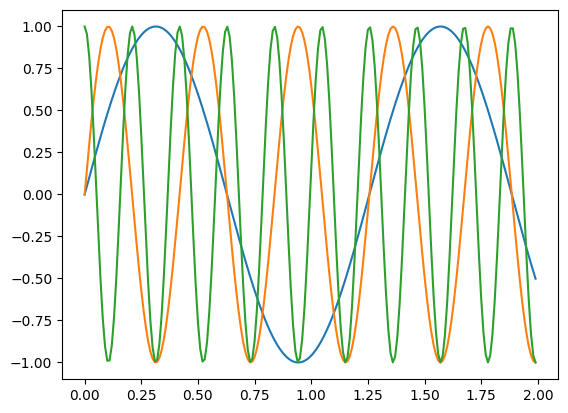

In [3]:
time = np.arange(0, 2, 1/100)
chan1 = np.sin(5 * time)
chan2 = np.sin(15 * time)
chan3 = np.cos(30 * time)
data = np.array([chan1, chan2, chan3])
data.shape
plt.plot(time, data.T);

**`mne.io.RawArray()`**: Create a `Raw()` object using the `RawArray()` function, giving the previously-created numpy array and a custom `Info()` object (create with `mne.create_info()`) with `ch_names` set as T1, T2, and Cz, channel types set as `'eeg'` and sampling frequency set at 100 Hz

In [4]:
raw = mne.io.RawArray(data=data, info=mne.create_info(ch_names=['Cz', 'Fz', 'Pz'], ch_types='eeg', sfreq=100))
raw

Creating RawArray with float64 data, n_channels=3, n_times=200
    Range : 0 ... 199 =      0.000 ...     1.990 secs
Ready.


<RawArray | 3 x 200 (2.0 s), ~12 kB, data loaded>

**`Raw.plot()`**: Plot the previously-created data as a time series.  Check that the channel names and timepoints are correctly labelled.

In [6]:
%matplotlib qt

In [8]:
raw.plot(duration=1.5, scalings="auto");

Channels marked as bad:
none


Get the channel names from the `Raw` object

In [9]:
raw.ch_names

['Cz', 'Fz', 'Pz']

In [10]:
raw.info['ch_names']

['Cz', 'Fz', 'Pz']

Get the metadata from the `Raw` object

**`Raw.get_data()`** Get the sensor data back as a numpy array.

In [15]:
raw.get_data().shape

(3, 200)

Pick only one of the channels to be converted to a Numpy array.

In [16]:
raw.get_data(picks='Fz').shape

(1, 200)

Modify the `Raw` object so that it only contains the Fz channel.

*Hint*: Create a copy of the object first so that the original data is not lost!

In [17]:
raw_fz = raw.copy()
raw_fz.pick(picks="Fz")
print(raw_fz.ch_names)
print(raw_fz.get_data().shape)

['Fz']
(1, 200)


**`Raw.to_data_frame()`** Get the sensor data back as a Pandas dataframe

In [19]:
raw.to_data_frame()

,time,Cz,Fz,Pz
0,0.00,0.000000,0.000000,1000000.000000
1,0.01,49979.169271,149438.132474,955336.489126
2,0.02,99833.416647,295520.206661,825335.614910
3,0.03,149438.132474,434965.534111,621609.968271
4,0.04,198669.330795,564642.473395,362357.754477
...,...,...,...,...
195,1.95,-319519.193622,-828075.508477,-371418.095480
196,1.96,-366479.129252,-902554.608210,-629209.641603
197,1.97,-412523.057917,-956764.277235,-830795.764386
198,1.98,-457535.893775,-989487.083255,-958169.375855


Get the sensor data back as a Pandas dataframe, in long format.

**`Raw.plot_sensors()`**: Plot the sensor montage.  

In [20]:
raw.set_montage('standard_1020')
raw.plot_sensors(show_names=True);

**`Raw.compute_psd()`** Compute the power spectrum of the electrodes.

In [45]:
psd = raw.compute_psd()
psd.plot();

Effective window size : 2.000 (s)


**`Raw.pick()`**  Plot the power spectrum of only the T1 and T2 channels.

In [41]:
raw.pick(['Fz', 'Pz'])
raw.plot(scalings="auto");

Channels marked as bad:
none


**`Raw.save()`**: Save an fif file with the raw data to the computer

In [42]:
raw.save("mydata_raw.fif", )

Writing c:\Users\tsbin\GitHub\CodeTeachingMaterials\notebooks\mydata_raw.fif
Closing c:\Users\tsbin\GitHub\CodeTeachingMaterials\notebooks\mydata_raw.fif
[done]


**`mne.io.read_raw_fif()`**: Read in the file you just created.  Is all the information still there?

In [44]:
mne.io.read_raw_fif("mydata_raw.fif", preload=True).plot(scalings="auto")

Opening raw data file mydata_raw.fif...
    Range : 0 ... 199 =      0.000 ...     1.990 secs
Ready.
Reading 0 ... 199  =      0.000 ...     1.990 secs...


Channels marked as bad:
none
